[View in Colaboratory](https://colab.research.google.com/github/mogamin/chainer-examples/blob/master/chainer_SSD_train_for_PASCAL_dataset_utils.ipynb)

In [35]:
# colabでのGPUメモリ,使用率を見る
#!/opt/bin/nvidia-smi

# colabで不要GPUプロセスを削除しメモリを開放する
#!apt install lsof
#!lsof /dev/nvidia*
#!ps f -o user,pgrp,pid,pcpu,pmem,start,time,command -p `lsof -n -w -t /dev/nvidia*`
#!kill -9 671
!/opt/bin/nvidia-smi

Wed Aug 29 18:24:26 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0   148W / 149W |   6728MiB / 11439MiB |     94%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

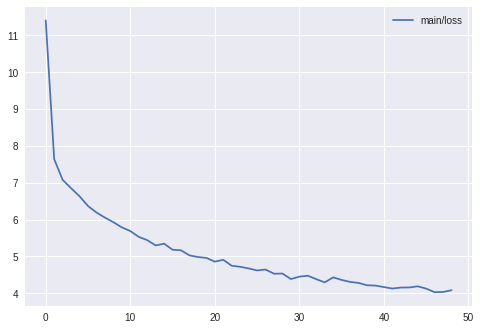

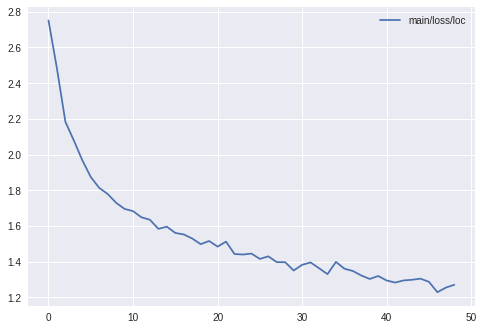

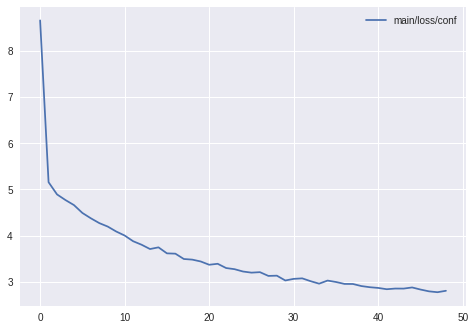

In [42]:
import json
import pandas as pd
with open('result/ssd/log') as f:
  result = pd.DataFrame(json.load(f)).interpolate()

result[['main/loss']].plot()
result[['main/loss/loc']].plot()
result[['main/loss/conf']].plot()

In [41]:
# モデルファイルの確認
!ls -lR result/

result/:
total 4
drwxr-xr-x 2 root root 4096 Aug 29 23:32 ssd

result/ssd:
total 762108
-rw-r--r-- 1 root root    20690 Aug 29 23:32 log
-rw-r--r-- 1 root root 97540537 Aug 29 18:39 model_iter_1000
-rw-r--r-- 1 root root 97541369 Aug 29 19:24 model_iter_1500
-rw-r--r-- 1 root root 97543606 Aug 29 20:08 model_iter_2000
-rw-r--r-- 1 root root 97547039 Aug 29 20:52 model_iter_2500
-rw-r--r-- 1 root root 97547090 Aug 29 21:36 model_iter_3000
-rw-r--r-- 1 root root 97549844 Aug 29 22:20 model_iter_3500
-rw-r--r-- 1 root root 97553533 Aug 29 23:04 model_iter_4000
-rw-r--r-- 1 root root 97537580 Aug 29 17:55 model_iter_500


In [0]:
import argparse
import matplotlib.pyplot as plt

import chainer

from chainercv.datasets import voc_bbox_label_names
from chainercv.links import SSD300
from chainercv.links import SSD512
from chainercv import utils
from chainercv.visualizations import vis_bbox

In [0]:
model = SSD300(n_fg_class=len(voc_bbox_label_names),　pretrained_model='result/ssd/')
chainer.cuda.get_device_from_id(0).use()
model.to_gpu()

img = utils.read_image(args.image, color=True)
bboxes, labels, scores = model.predict([img])
bbox, label, score = bboxes[0], labels[0], scores[0]

vis_bbox(img, bbox, label, score, label_names=voc_bbox_label_names)
plt.show()
